# **Waze User Churn Project**

**Google Advanced Data Analyst Certificate**

**Course 6 - The nuts and bolts of machine learning**

目前Waze数据团队正在进行一项用户流失项目，业务方希望构建一个机器学习模型来预测用户流失。为了获得最佳结果，你们决定构建和测试两种基于树的模型：随机森林和XGBoost。

你们的工作将帮助业务方进行精准业务决策，防止用户流失，改善用户留存，并促进Waze的业务增长。

## 预测目标

使用Random Forest或者XGBoost来预测一个二元目标类别，即预测一个Waze用户是否保留或流失。


**第一部分：** 伦理因素

讨论项目结果相关伦理因素，考虑是否应该调整模型的目标。

**第二部分：** 特征工程

进行特征选择、提取和转换，为建模准备数据

**第三部分：** 建模

构建模型，评估它们，并提供下一步建议

## **PACE: Plan**

1. 项目目标：构建机器学习模型来预测用户流失，并找到驱动用户流失的因素。

2. 伦理影响：

    - 假阴性意味着模型未能捕捉到驱动用户流失的因素，这可能会错误地引导改进行动。
    - 假阳性意味着模型预测用户流失，而实际上用户没有流失，这可能会导致资源浪费和为了防止这些保留用户流失而产生的成本。

3. 伦理考虑：

    改进某事总比什么都不做要好。
    通常，随机森林或XGBoost模型的准确率比单独的模型（如逻辑回归模型）更高。由于准确率意味着效率和操作行动的成本更低，因此有必要追求更高准确率的更好模型。

### 数据导入

导入构建和评估随机森林和XGBoost分类模型所需的包和库。

In [1]:
# Import packages for data manipulation
import pandas as pd
import numpy as np
# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree
# This lets us see all of the columns, preventing Juptyer from redacting them.
pd.set_option('display.max_columns', None)
# Import packages for data modeling
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# This is the function that helps plot feature importance
from xgboost import plot_importance
# This module lets us save our models once we fit them.
import pickle

导入数据并展示相关列。

In [2]:
# Import dataset
df0 = pd.read_csv('waze_dataset.csv')

In [3]:
# Inspect the first five rows
df0.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


## **PACE: Analyze**
分析数据，并对相关变量进行特征工程。

### **特征工程**

In [4]:
# Copy the df0 dataframe
df = df0.copy()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


#### **`km_per_driving_day`**

1. 创建一个特征，表示每个用户在过去一个月中每天驾驶的平均公里数。

2. 获取这个新特征的描述性统计信息。


In [6]:
# 1. Create `km_per_driving_day` feature
df['km_per_driving_day'] = df['driven_km_drives'] / df['driving_days']
# 2. Get descriptive stats
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,1.499900e+04
mean,7499.000000,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879,inf
std,4329.982679,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036,NaN
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,3.022063e+00
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000,1.672804e+02
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000,3.231459e+02
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000,7.579257e+02
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000,inf


注意到`km_per_driving_day`含有异常值`inf`，这是由于用户在上月驾驶天数为0导致的，使用0替代该列的异常值。

In [7]:
# 1. Convert infinite values to zero
df['km_per_driving_day'] = df['km_per_driving_day'].replace(np.inf, 0)
# 2. Confirm that it worked
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879,578.963113
std,4329.982679,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036,1030.094384
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000,136.238895
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000,272.889272
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000,558.686918
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000,15420.234110


#### **`percent_sessions_in_last_month`**

1. 创建新的一列，表示与用户在上个月产生的会话占历史会话的比例。这个特征用来描述用户近期使用软件的强度。

2. 获取这个新特征的描述性统计信息。

In [8]:
# 1. Create `percent_sessions_in_last_month` feature
df['percent_sessions_in_last_month'] = df['sessions'] / df['total_sessions']
# 2. Get descriptive stats
df['percent_sessions_in_last_month'].describe()

count    14999.000000
mean         0.449255
std          0.286919
min          0.000000
25%          0.196221
50%          0.423097
75%          0.687216
max          1.530637
Name: percent_sessions_in_last_month, dtype: float64

#### **`professional_driver`**

创建一个描述用户是否是职业司机的新特征，使用0表示不是职业司机，1表示该用户是职业司机。

职业司机的判定标准：

- 最近一个月有15天以上在开车
- 最近一个月完成60个及以上行程。


In [9]:
# Create `professional_driver` feature
df['professional_driver'] = np.where((df['drives'] >= 60) & (df['driving_days'] > 15), 1, 0)

In [10]:
df[['professional_driver', 'drives', 'driving_days']].drop_duplicates().head()

,professional_driver,drives,driving_days
0,1,226,19
1,0,107,11
2,0,95,8
3,0,40,3
4,1,68,18


#### **`total_sessions_per_day`**

创建一个新的特征，表示用户创建账户以来平均每日产生的会话数。

In [11]:
# Create `total_sessions_per_day` feature
df['total_sessions_per_day'] = df['total_sessions'] / df['n_days_after_onboarding']
df['total_sessions_per_day'].describe()

count    14999.000000
mean         0.338698
std          1.314333
min          0.000298
25%          0.051037
50%          0.100775
75%          0.216269
max         39.763874
Name: total_sessions_per_day, dtype: float64

#### **`km_per_hour`**

创建一个新特征，表示用户最近一个月在平均驾驶速度。

In [12]:
# Create `km_per_hour` feature
df['km_per_hour'] = df['driven_km_drives'] / (df['duration_minutes_drives'] / 60)
df['km_per_hour'].describe()

count    14999.000000
mean       190.394608
std        334.674026
min         72.013095
25%         90.706222
50%        122.382022
75%        193.130119
max      23642.920871
Name: km_per_hour, dtype: float64

#### **`km_per_drive`**

创建一个新特征，表示用户最近一个月单程平均驾驶距离。

In [13]:
# Create `km_per_drive` feature
df['km_per_drive'] = df['driven_km_drives'] / df['drives']
df['km_per_drive'].describe()

count    1.499900e+04
mean              inf
std               NaN
min      1.008775e+00
25%      3.323065e+01
50%      7.488006e+01
75%      1.854667e+02
max               inf
Name: km_per_drive, dtype: float64

出现异常值`inf`，这是由于用户上月驾驶次数为0导致的，按照特征含义直接用0替换即可。

In [14]:
# 1. Convert infinite values to zero
df['km_per_drive'] = df['km_per_drive'].replace(np.inf, 0)
# 2. Confirm that it worked
df['km_per_drive'].describe()

count    14999.000000
mean       232.817946
std        620.622351
min          0.000000
25%         32.424301
50%         72.854343
75%        179.347527
max      15777.426560
Name: km_per_drive, dtype: float64

#### **`percent_of_sessions_to_favorite`**

创建一个新特征，表示用户驾驶其所收藏的行程产生的会话占所有行程会话数的比例。

由于经常驾驶收藏行程的用户可能具有更高的粘性，因此该特征可以用来判断用户是否会流失。

In [15]:
# Create `percent_of_sessions_to_favorite` feature
df['percent_of_sessions_to_favorite'] = df['total_navigations_fav1']  / df['total_sessions']
# Get descriptive stats
df['percent_of_sessions_to_favorite'].describe()

count    14999.000000
mean         1.368816
std          8.604996
min          0.000000
25%          0.047207
50%          0.421757
75%          1.281549
max        754.604073
Name: percent_of_sessions_to_favorite, dtype: float64

### **Drop missing values**
预测目标`label`列包含700行缺失值，可以直接删去。

In [16]:
# Drop rows with missing values
df = df.dropna(how='any', axis=0)
df.isna().sum().sum()

0

### **异常值处理**
由于树模型对于异常值有较高的包容度，因此这里不对异常值做进一步处理。

### **数据转换**

#### **特征编码**
由于`device`特征是一个类型数据，需要将其转换为编码数据。

* `Android` -> `0`
* `iPhone` -> `1`

In [17]:
df['device2'] = df['device'].map({'Android': 0, 'iPhone': 1})
df['device2'].value_counts()

device2
1    9225
0    5074
Name: count, dtype: int64

In [18]:
df['device'].value_counts()

device
iPhone     9225
Android    5074
Name: count, dtype: int64

预测目标`label`是一个二元类型变量，需要将其转化为编码数据。

- `retained` -> `0`
- `churned` -> `1`

In [19]:
# Create binary `label2` column
### YOUR CODE HERE ###
df['label2'] = np.where(df['label'] == 'churned', 1, 0)
df['label2'].value_counts()

label2
0    11763
1     2536
Name: count, dtype: int64

In [20]:
df['label'].value_counts()

label
retained    11763
churned      2536
Name: count, dtype: int64

### **特征选择**

由于树模型能够较好地处理多重共线性，因此仅需要把`ID`列和类型数据类删除即可。

In [21]:
# Drop `ID` column
df.drop(columns='ID', inplace=True)

### **模型评估指标**

在确定评估指标之前，需要检查特征比例平衡性。

In [22]:
# Get class balance of 'label' col
df['label'].value_counts()

label
retained    11763
churned      2536
Name: count, dtype: int64

数据集中大约有18%的用户流失，这并不是一个平衡的数据集，但是标签比例并不是极度失衡，因此不需要重新平衡标签类型。

由于该模型需要直接用于挽回流失用户，涉及到资源投入等问题，因此需要尽可能减少假阳性，避免资源浪费。因此，该模型应基于recall（召回率）进行评估。

## **PACE: Construct**

### **Workflow**
最终的建模数据集包含14,299个样本。这处于可以被认为足够进行健壮的模型选择过程的下限范围，但仍然可行。

1. 将数据分割成训练/验证/测试集（60/20/20）这将导致验证集和测试集中有约2,860个样本，约18%(即515个样本)将代表流失的用户。

2. 在训练集上拟合模型并调整超参数。

3. 在验证集上进行最终模型选择。

4. 评估优胜模型在测试集上的性能。


### **数据分割**

In [23]:
# 1. Isolate X variables
X = df.drop(columns=['device', 'label', 'label2'])
# 2. Isolate y variable
y = df['label2']
# 3. Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)
# 4. Split into train and validate sets
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.25, stratify=y_train, random_state=0)

In [24]:
# 检查分割后的数据量
X_tr.shape, X_val.shape, X_test.shape

((8579, 18), (2860, 18), (2860, 18))

In [25]:
y_tr.value_counts(normalize=True)

label2
0    0.82259
1    0.17741
Name: proportion, dtype: float64

In [26]:
y_val.value_counts(normalize=True)

label2
0    0.822727
1    0.177273
Name: proportion, dtype: float64

In [27]:
y_test.value_counts(normalize=True)

label2
0    0.822727
1    0.177273
Name: proportion, dtype: float64

### **建模**

#### **Random forest**

使用`GridSearchCV`进行调参。

1. 模型初始化。

2. 创建`cv_params`参数字典
   - `max_depth`
   - `max_features`
   - `max_samples`
   - `min_samples_leaf`
   - `min_samples_split`
   - `n_estimators`

3. `scoring` 参数选取precision, recall, F1 score, accuracy

4. `cv=_`选取`4`
5. `refit`选取recall



In [28]:
# 1. Instantiate the random forest classifier
rf = RandomForestClassifier(random_state=0)
# 2. Create a dictionary of hyperparameters to tune
params = {
    'max_depth': [10, 12, 14, 16],
    'max_features': [None],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3],
    'n_estimators': [100, 200, 300]
}
# 3. Define a dictionary of scoring metrics to capture
scores = ['accuracy', 'precision', 'recall', 'f1']
# 4. Instantiate the GridSearchCV object
rf_cv = GridSearchCV(
    estimator=rf,
    param_grid=params,
    scoring=scores,
    cv=4,
    refit='recall',
    n_jobs=5
)

In [29]:
# Fit the model
rf_cv.fit(X_tr, y_tr)

GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0), n_jobs=5,
             param_grid={'max_depth': [10, 12, 14, 16], 'max_features': [None],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [100, 200, 300]},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'])

检查交叉验证集的平均得分情况。

In [30]:
# Examine best score
rf_cv.best_score_

0.12220955933139938

检查Grid Search最优参数。

In [31]:
# Examine best hyperparameter combo
rf_cv.best_params_

{'max_depth': 16,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 200}

收集整理模型概况。

In [32]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, or accuracy

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

  # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {
        'f1': 'mean_test_f1',
        'accuracy': 'mean_test_accuracy',
        'precision': 'mean_test_precision',
        'recall': 'mean_test_recall'
    }

  # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

  # Isolate the row of the df with the max(metric) score
    best_result = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(),:]

  # Extract Accuracy, precision, recall, and f1 score from that row
    scores = {
        'Model': [model_name],
        'Accuracy': [best_result[metric_dict['accuracy']]],
        'Precision': [best_result[metric_dict['precision']]],
        'Recall': [best_result[metric_dict['recall']]],
        'F1': [best_result[metric_dict['f1']]]
    }
  # Create table of results
    return pd.DataFrame(scores)

In [33]:
results = pd.DataFrame()
results_rf_cv = make_results('Tuned Random Forest', rf_cv, 'recall')
results = pd.concat([results, results_rf_cv], ignore_index=True)
results

,Model,Accuracy,Precision,Recall,F1
0,Tuned Random Forest,0.818044,0.451875,0.12221,0.191917


除了准确率之外，分数并不那么理想。在之前构建逻辑回归模型时，召回率约为0.09，这意味着这个模型的召回率比上一个模型高出33%，而准确率大致相同，而且这个模型使用的数据量更少。

#### **XGBoost**

1. 初始化XGBoost分类器。
2. 创建`cv_params`参数字典。
   - `max_depth`
   - `min_child_weight`
   - `learning_rate`
   - `n_estimators`
3. `scoring` 参数选取precision, recall, F1 score, accuracy
4. `cv=_`选取`4`
5. `refit`选取recall

In [34]:
# 1. Instantiate the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=0)

# 2. Create a dictionary of hyperparameters to tune
xgb_para = {
    'n_estimators': [100, 150, 200, 300],
    'max_depth': [6, 8, 10, 12],
    'min_child_weight': [3, 4, 5],
    'learning_rate': [0.1, 0.2]
}

# 3. Define a dictionary of scoring metrics to capture
scores = ['accuracy', 'precision', 'recall', 'f1']
# 4. Instantiate the GridSearchCV object
xgb_cv = GridSearchCV(
    estimator=xgb,
    cv=4,
    param_grid=xgb_para,
    refit='recall',
    scoring=scores,
    n_jobs=5
)

In [35]:
# Fit the model
xgb_cv.fit(X_tr, y_tr)

GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             n_jobs=5,
             param_grid={'learning_rate': [0.1, 0.2],
                         'max_depth': [6, 8, 10, 12],
                         'min_child_weight': [3, 4, 5],
                         'n_estimators': [100, 150, 200, 300]},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'])

检查模型最优得分情况。

In [36]:
# Examine best score
xgb_cv.best_score_

0.17740019339687801

检查模型最优参数。

In [37]:
# Examine best parameters
### YOUR CODE HERE ###
xgb_cv.best_params_

{'learning_rate': 0.2,
 'max_depth': 12,
 'min_child_weight': 5,
 'n_estimators': 300}

收集整理XGBoost模型数据。

In [38]:
results_xgb_cv = make_results('Tuned XGBoost', xgb_cv, 'recall')
results = pd.concat([results, results_xgb_cv], ignore_index=True)
results

,Model,Accuracy,Precision,Recall,F1
0,Tuned Random Forest,0.818044,0.451875,0.12221,0.191917
1,Tuned XGBoost,0.807437,0.404857,0.17740,0.245786



XGBoost模型比随机森林模型更适合数据，召回率几乎是逻辑回归模型的召回率的两倍，比随机森林模型的召回率提高了45%，同时保持了类似的准确率分数，但精度有所下降。

### **模型选择**

使用最佳的随机森林模型和最佳的XGBoost模型对验证集进行预测，选择召回率更高的模型。

#### **Random forest**

In [39]:
# Use random forest model to predict on validation data
y_val_pred = rf_cv.predict(X_val)

定义`get_test_scores`函数收集验证集数据。

In [40]:
def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Generate a table of test scores.

    In:
        model_name (string): Your choice: how the model will be named in the output table
        preds: numpy array of test predictions
        y_test_data: numpy array of y_test data

    Out:
        table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'Model': [model_name],
                          'Accuracy': [accuracy],
                          'Precision': [precision],
                          'Recall': [recall],
                          'F1': [f1]
                          })

    return table

In [41]:
# Get validation scores for RF model
rf_val = get_test_scores('Tuned Random Forest (Validation)', y_val_pred, y_val)
# Append to the results table
results = pd.concat([results, rf_val], ignore_index=True)

In [42]:
results

,Model,Accuracy,Precision,Recall,F1
0,Tuned Random Forest,0.818044,0.451875,0.122210,0.191917
1,Tuned XGBoost,0.807437,0.404857,0.177400,0.245786
2,Tuned Random Forest (Validation),0.822727,0.500000,0.134122,0.211509


在验证集上，模型分数都有一定上升，但在合理范围内。这意味着模型没有过度拟合训练数据。

#### **XGBoost**

In [43]:
# Use XGBoost model to predict on validation data
y_val_pred = xgb_cv.predict(X_val)
# Get validation scores for XGBoost model
xgb_val = get_test_scores('Tuned XGBoost (Validation)', y_val_pred, y_val)
# Append to the results table
results = pd.concat([results, xgb_val], ignore_index=True)
results

,Model,Accuracy,Precision,Recall,F1
0,Tuned Random Forest,0.818044,0.451875,0.122210,0.191917
1,Tuned XGBoost,0.807437,0.404857,0.177400,0.245786
2,Tuned Random Forest (Validation),0.822727,0.500000,0.134122,0.211509
3,Tuned XGBoost (Validation),0.810140,0.419643,0.185404,0.257182


与随机森林模型一样，XGBoost模型的验证分数稍高一些，但只是很小的差距。XGboost在召回率数据上明显优于随机森林模型，但精度更低。

## **PACE: Execute**

### **结果预测及模型评估**

In [44]:
# Use XGBoost model to predict on test data
y_pred_xgb = xgb_cv.predict(X_test)
# Get test scores for XGBoost model
xgb_test = get_test_scores('Tuned XGBoost (Test)', y_pred_xgb, y_test)
# Append to the results table
results = pd.concat([results, xgb_test], ignore_index=True)
results

,Model,Accuracy,Precision,Recall,F1
0,Tuned Random Forest,0.818044,0.451875,0.122210,0.191917
1,Tuned XGBoost,0.807437,0.404857,0.177400,0.245786
2,Tuned Random Forest (Validation),0.822727,0.500000,0.134122,0.211509
3,Tuned XGBoost (Validation),0.810140,0.419643,0.185404,0.257182
4,Tuned XGBoost (Test),0.806643,0.394495,0.169625,0.237241


在测试集上，召回率比训练集和验证集有所下降，而且模型精度仅有0.39，导致F1和准确率都有明显的下降。

### **混淆矩阵**

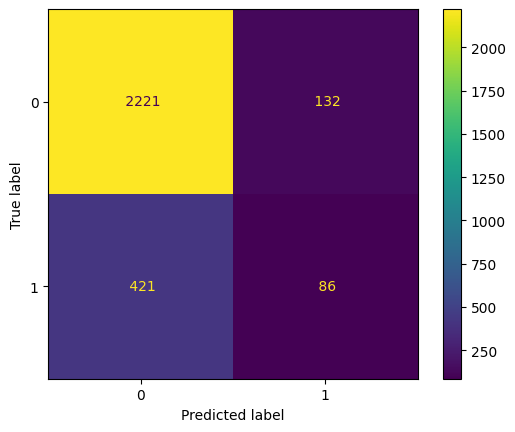

In [45]:
# Generate array of values for confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb, labels=xgb_cv.classes_)
# Plot confusion matrix
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=xgb_cv.classes_
)
disp.plot(values_format=' ')

通过混淆矩阵我们发现，调参后的XGBoost模型的假阴性数量约为假阳性数量的三倍多，并且只有16.96%的流失用户被预测出来。

### **Feature Importance**

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

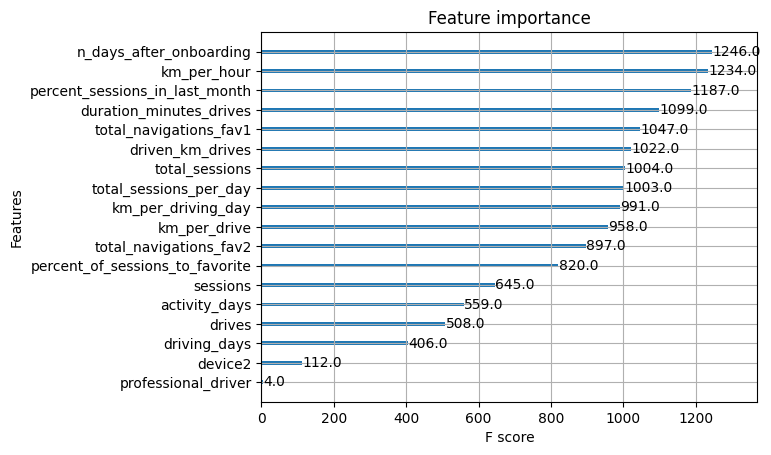

In [46]:
plot_importance(xgb_cv.best_estimator_)

1. 在本次模型所包含的全部特征中，APP服务天数是影响留存或流失的最重要的因素，这表示Waze APP的使用具有较为明显的用户使用周期特征。排名第六的特征为会话数，这也一定程度上支持了该结论。
2. 排名前三的特征中，驾驶平均速度、上月会话数占历史会话的比例都是特征工程中新创建的特征，其中驾驶速度反映了用户开车习惯，上月会话数占比一定程度上反映了用户的生命周期。
3. 排名靠前的特征可分为两类，一类是用户驾驶时的偏好，包括速度、收藏路线占比、单程距离、日均驾驶距离；另一类是用户周期特征，包括APP服务天数、上月驾驶时长和驾驶距离，以及日均会话数。

### **模型结论**

1. 本次所建立的模型预测性不足，其召回率和精度非常低。如果需要用于生产环境，则需要进一步收集和处理更多预测性比较高的模型特征，进行后续建模。
2. 在已提供的特征中，APP服务天数、驾驶速度、上月会话数占比是重要性最高的三大特征，从用户生命周期（使用了多久？是新用户还是老用户？）、用户偏好两方面影响着用户流失。
3. 在后续特征收集和应用方面，可以进行特征工程来尝试生成更好的预测信号。本次构建的模型中，工程化特征占了模型使用的前十个最具预测性的特征的一半以上。此外，重新构建模型时使用不同的预测变量组合也可能有所帮助，以减少来自不具预测性特征的噪音。另外，可以尝试收集更细粒度的数据用于预测，例如再用户旅程中用户关键动线中的具体行为数据。
4. 在模型选择方面，树模型较之于Logistic模型，虽然有更高预测准确性，但在可解释性方面比较弱。如果最终模型应用侧重于预测，则后续建模可继续考虑使用树模型；如果最终结果需要应用于运营策略的制定和落地，从而改进用户流失相关因素，则推荐使用其他解释性更强的模型。
